           Date    .GDAXI     SAPG.DE  SIEGn.DE  DTEGn.DE  AIRG.DE  ALVG.DE   
0    2022-04-29  14097.88   97.026932    117.78    17.570   105.50   216.20  \
1    2022-05-02  13939.07   95.982669    115.12    17.290   103.96   215.00   
2    2022-05-03  14039.47   94.729554    114.56    17.376   106.44   217.00   
3    2022-05-04  13970.82   92.979171    115.78    17.530   102.68   213.55   
4    2022-05-05  13902.52   94.699718    116.58    17.592   108.96   199.76   
..          ...       ...         ...       ...       ...      ...      ...   
245  2023-04-12  15703.60  116.620000    144.82    22.400   126.20   218.40   
246  2023-04-13  15729.46  115.960000    144.28    22.305   125.90   219.10   
247  2023-04-14  15807.50  115.960000    146.16    22.215   126.16   219.10   
248  2023-04-17  15789.53  116.360000    147.06    22.345   128.10   216.50   
249  2023-04-18  15882.67  116.720000    147.20    22.455   128.28   219.00   

     MBGn.DE  VOWG_p.DE  BMWG.DE  ...  CONG.DE  HEI

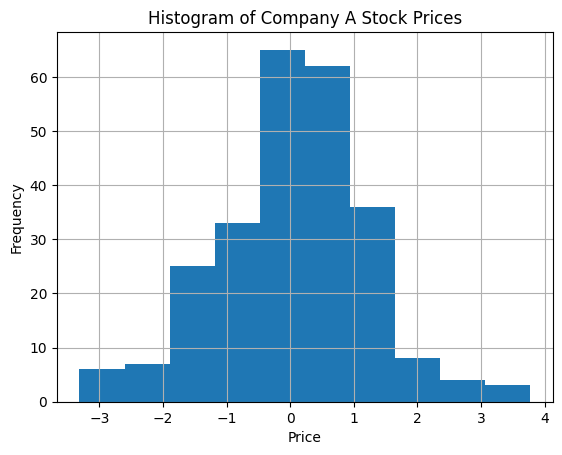

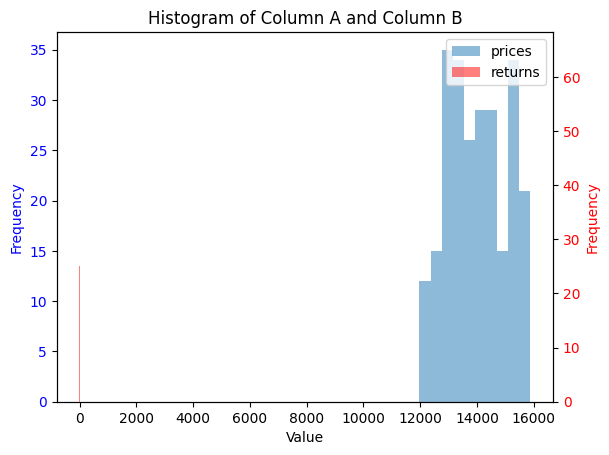

The company with the highest mean arithmetic return is CBKG.DE_arithmetic_returns.


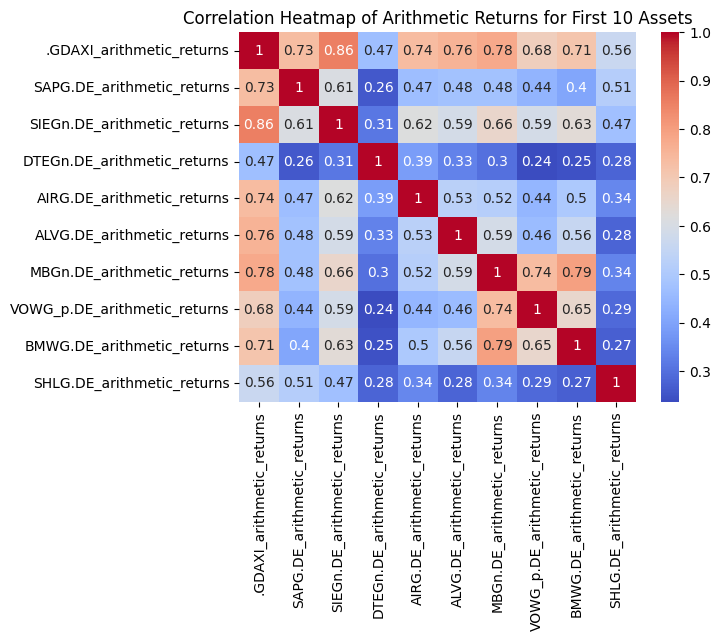

Pair with highest correlation: ('.GDAXI_arithmetic_returns', '.GDAXI_arithmetic_returns')
Correlation value: 1.0
Pair with lowest correlation: ('CBKG.DE_arithmetic_returns', 'QIA.DE_arithmetic_returns')
Correlation value: 0.013871935085845688


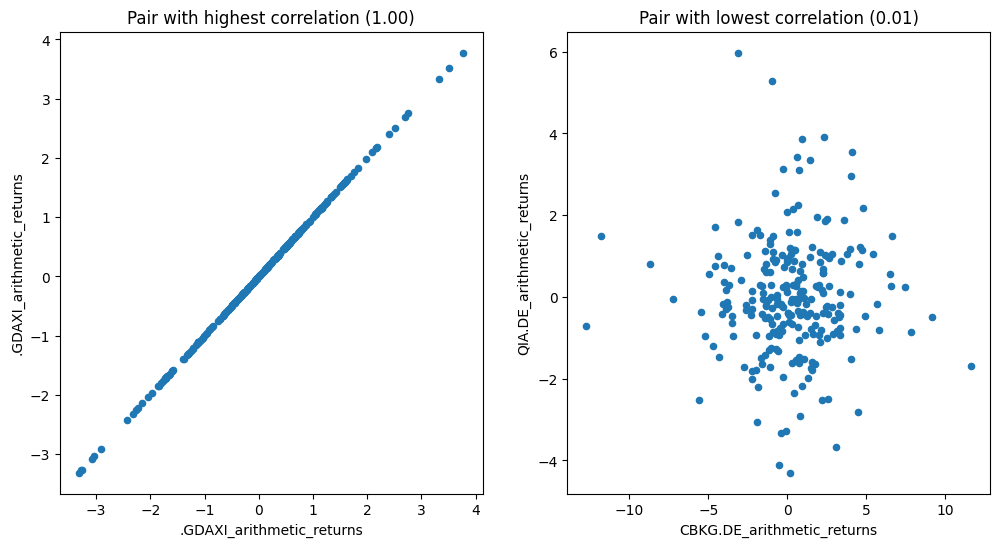

Annualized Volatility:
.GDAXI_logarithmic_returns       19.200731
SAPG.DE_logarithmic_returns      24.355347
SIEGn.DE_logarithmic_returns     31.392397
DTEGn.DE_logarithmic_returns     16.914199
AIRG.DE_logarithmic_returns      29.916214
ALVG.DE_logarithmic_returns      22.591250
MBGn.DE_logarithmic_returns      33.298425
VOWG_p.DE_logarithmic_returns    34.608789
BMWG.DE_logarithmic_returns      26.751952
SHLG.DE_logarithmic_returns      31.020500
BAYGn.DE_logarithmic_returns     29.543934
DPWGn.DE_logarithmic_returns     30.462040
IFXGn.DE_logarithmic_returns     40.788777
MUVGn.DE_logarithmic_returns     22.848309
BASFn.DE_logarithmic_returns     32.928158
DB1Gn.DE_logarithmic_returns     19.664940
EONGn.DE_logarithmic_returns     25.461609
HNKG_p.DE_logarithmic_returns    16.995599
BEIG.DE_logarithmic_returns      19.199043
RWEG.DE_logarithmic_returns      28.512860
ADSGn.DE_logarithmic_returns     44.043272
SATG_p.DE_logarithmic_returns    48.879552
DTGGe.DE_logarithmic_returns   

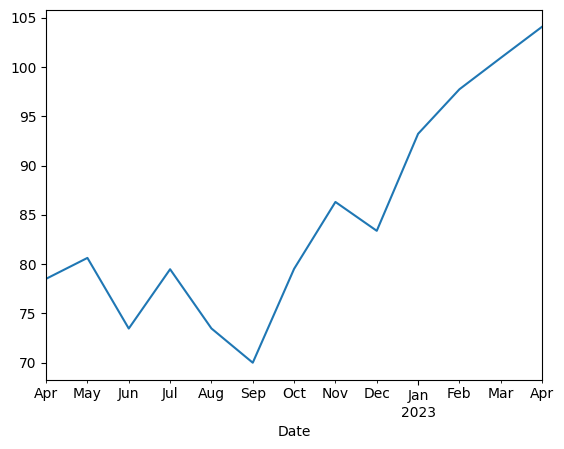

<function posix.system(command)>

In [1]:
"""
Part 1 - Install and Importing relevant packages
"""
#import pkg_resources
#pkg_resources.working_set.by_key.keys()
#pip install --upgrade pip
#pip list
#pip install pandas
#pip install matplotlib
#pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
"""
First group of tasks 
"""
#setting working directory
import os
os.chdir("/Users/isa/Downloads/pythondataMLU220213600/220213600/homework")
# Task 1.1 Load the stock price data
prices = pd.read_csv('02_python_data.csv')
print(prices)
returns = pd.DataFrame()
logreturns= pd.DataFrame()
# Task 1.2 Calculate both arithmetic as well as logarithmic returns for all assets
# Loop through each column (i.e., each asset) in the DataFrame
for col in prices.columns[1:]:  # Skip the first column
    # Calculate arithmetic returns for the column
    arithmetic_returns = prices[col].pct_change() * 100

    # Calculate logarithmic returns for the column
    logarithmic_returns = np.log(prices[col] / prices[col].shift(1)) * 100

    # Add the results to the returns DataFrame
    returns[f'{col}_arithmetic_returns'] = arithmetic_returns
    logreturns[f'{col}_logarithmic_returns'] = logarithmic_returns
# Print the results for the first few rows of the returns DataFrame
# Task 1.3 Display the first 5 rows of each data frame.
print(returns.head())
print(logreturns.head())
"""
Second group of tasks 
"""
# Task 2.1
returns['.GDAXI_arithmetic_returns'].hist()
plt.title('Histogram of Company A Stock Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
# Task 2.2
fig, ax1 = plt.subplots()
# Plot a histogram of 'Column A' in df1 on the first y-axis
ax1.hist(prices['.GDAXI'], alpha=0.5, label='prices')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Create a second y-axis on the right side of the plot
ax2 = ax1.twinx()
# Plot a histogram of 'Column B' in df2 on the second y-axis
ax2.hist(returns['.GDAXI_arithmetic_returns'], alpha=0.5, color='red', label='returns')
ax2.set_ylabel('Frequency', color='red')
ax2.tick_params(axis='y', labelcolor='red')
# Add a title to the plot
plt.title('Histogram of Column A and Column B')
# Add a legend to the plot
handles, labels = [], []
for ax in [ax1, ax2]:
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)
plt.legend(handles, labels)
# Display the plot
plt.show()
"""
Third group of tasks 
"""
# Task 3.1
mean_returns = returns.mean()
# Find the company with the highest mean arithmetic return
highest_return = mean_returns.idxmax()
# Print the result
print(f"The company with the highest mean arithmetic return is {highest_return}.")
"""
Fourth group of tasks
"""
# Task 4.1
first_10_assets = returns.iloc[:, :10]
# Calculate the pairwise correlations between the columns
correlations = first_10_assets.corr()
# Plot the correlation matrix as a heatmap
sns.heatmap(correlations, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap of Arithmetic Returns for First 10 Assets')
plt.show()
"""
Fifth group of tasks
"""
# Task 5.1
# Calculate the pairwise correlations for all of the assets
correlations = returns.corr()
# Find the pair with the highest correlation
highest_corr = correlations.max().max()
pair_with_highest_corr = correlations.stack().idxmax()
print('Pair with highest correlation:', pair_with_highest_corr)
print('Correlation value:', highest_corr)
# Task 5.2
#Find the pair of lowest correlation
lowest_corr = correlations.min().min()
pair_with_lowest_corr = correlations.stack().idxmin()
print('Pair with lowest correlation:', pair_with_lowest_corr)
print('Correlation value:', lowest_corr)
# Task 5.3
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
returns.plot.scatter(x=pair_with_highest_corr[0], y=pair_with_highest_corr[1], ax=axes[0])
returns.plot.scatter(x=pair_with_lowest_corr[0], y=pair_with_lowest_corr[1], ax=axes[1])
# Set titles for the scatter plots
axes[0].set_title(f'Pair with highest correlation ({highest_corr:.2f})')
axes[1].set_title(f'Pair with lowest correlation ({lowest_corr:.2f})')
plt.show()
"""
Sixth group of tasks
"""
# Task 6.1
trading_days = 252
volatility = logreturns.std() * np.sqrt(trading_days)
return_annualized = logreturns.mean() * trading_days
# Print the results
print('Annualized Volatility:')
print(volatility)
print('\nAnnualized Return:')
print(return_annualized)
# Task 6.2
risk_free_rate = 0.005
sharpe_ratio = (return_annualized - risk_free_rate) / volatility
print('\nSharpe Ratio:')
print(sharpe_ratio)
"""
Seventh group of tasks
"""
# Task 7.1
prices.set_index('Date', inplace=True)
prices.index = pd.to_datetime(prices.index)

# Resample to monthly frequency and take the last value of each month
prices_monthly = prices.resample('M').last()

# Plot monthly prices for 'BMWG.DE'
prices_monthly['BMWG.DE'].plot()

plt.show()
#Note if last part doesnt run properly and produce only one value it might be that somehow Date column became corrupted, so at the end check columns and see if Date is still there 
# print(prices.columns)
"""
Part __ - Converting file
"""
os.system